In [1]:
import os

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

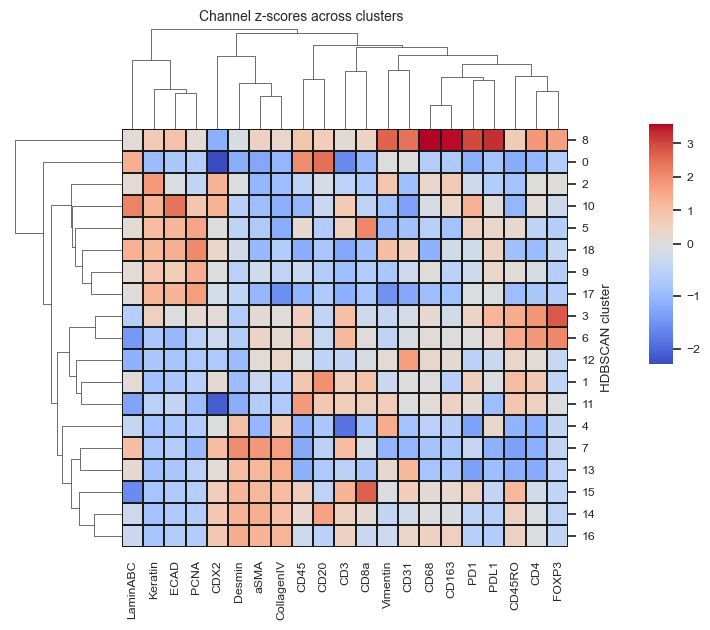

In [2]:
# Paths and input
out = os.path.join(os.getcwd(), 'output/hdbscan_clustermap')
if not os.path.exists(out):
    os.makedirs(out)

# Read single-cell sample for VAE analysis
main = pd.read_csv(os.path.join(os.getcwd(), 'input/main.csv'))

abx_channels = {
    'anti_CD3': 'CD3', 'anti_CD45RO': 'CD45RO', 'Keratin_570': 'Keratin',
    'aSMA_660': 'aSMA','CD4_488': 'CD4', 'CD45_PE': 'CD45',
    'PD1_647': 'PD1', 'CD20_488': 'CD20', 'CD68_555': 'CD68',
    'CD8a_660': 'CD8a', 'CD163_488': 'CD163', 'FOXP3_570': 'FOXP3',
    'PDL1_647': 'PDL1', 'Ecad_488': 'ECAD', 'Vimentin_555': 'Vimentin',
    'CDX2_647': 'CDX2', 'LaminABC_488': 'LaminABC', 'Desmin_555': 'Desmin',
    'CD31_647': 'CD31', 'PCNA_488': 'PCNA', 'CollagenIV_647': 'CollagenIV'
}

clustermap_input = main[list(abx_channels.keys()) + ['HDBSCAN']].groupby('HDBSCAN').mean()

sns.set(font_scale=0.8)

# Compute per channel z-scores across clusters
clustermap_input = (clustermap_input-clustermap_input.mean())/clustermap_input.std()

# Zero-center colorbar
norm = TwoSlopeNorm(vcenter=0, vmin=clustermap_input.min().min(), vmax=clustermap_input.max().max())

g = sns.clustermap(
        clustermap_input, cmap='coolwarm', standard_scale=None, yticklabels=1, xticklabels=1,
        linewidths=0.1, linecolor='k', cbar=True, norm=norm 
    )
g.fig.set_size_inches(6.0, 6.0)
g.ax_heatmap.set_xticklabels([abx_channels[i.get_text()] for i in g.ax_heatmap.get_xticklabels()], rotation=90)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0)
g.ax_heatmap.set_ylabel('HDBSCAN cluster')
g.cax.set_position([1.08, 0.42, 0.04, 0.4])
g.fig.suptitle('Channel z-scores', y=1.01, fontsize=10)
plt.savefig(os.path.join(out, 'channel_z-scrores.pdf'), bbox_inches='tight')
plt.show()
plt.close('all')